# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [80]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd



# Read the City and Ride Data
city_data_df = pd.read_csv("Resources/city_data.csv")
ride_data_df = pd.read_csv("Resources/ride_data.csv")





### Merge the DataFrames

In [81]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])


# Display the data table for preview
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


## Deliverable 1: Get a Summary DataFrame 

In [82]:
#  1. Get the total rides for each city type

total_rides_for_city= pyber_data_df.groupby("type")["ride_id"].count()

total_rides_for_city




type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [83]:
# 2. Get the total drivers for each city type



total_drivers =city_data_df.groupby("type")["driver_count"].sum()
total_drivers




type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [84]:
#  3. Get the total amount of fares for each city type
total_amount_fares = pyber_data_df.groupby("type")["fare"].sum()
total_amount_fares 


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [85]:
#  4. Get the average fare per ride for each city type. 
average_fare_ride = pyber_data_df.groupby("type")["fare"].sum()/pyber_data_df.groupby("type")["ride_id"].count()
average_fare_ride 

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [86]:
# 5. Get the average fare per driver for each city type. 
average_fare_driver = pyber_data_df.groupby("type")["fare"].sum()/city_data_df.groupby("type")["driver_count"].sum()

average_fare_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [87]:
#  6. Create a PyBer summary DataFrame. 

summary = pd.DataFrame({"Total Rides": total_rides_for_city,
                         "Total Drivers":total_drivers,
                       "Total Fares":total_amount_fares ,
                       "Average Fare per Ride": average_fare_ride,
                        "Average Fare per Driver": average_fare_driver})

summary



,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [88]:
#  7. Cleaning up the DataFrame. Delete the index name
summary.index.name = None
summary

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [89]:
#  8. Format the columns.
summary['Total Rides'] = summary['Total Rides'].map("{:,}".format)
summary['Total Drivers'] = summary['Total Drivers'].map("{:,}".format)
summary['Total Fares'] = summary['Total Fares'].map("${:,.2f}".format)
summary['Average Fare per Ride'] = summary['Average Fare per Ride'].map("${:,.2f}".format)
summary['Average Fare per Driver'] = summary['Average Fare per Driver'].map("${:,.2f}".format)
summary

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [90]:
# 1. Read the merged DataFrame
pyber_data_df


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [91]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_by_date = pyber_data_df.groupby(["type","date"])["fare"].sum()
fares_by_date

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [92]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fares_by_date = fares_by_date.reset_index()
fares_by_date


,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [93]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_by_date_pivoted = pd.pivot_table(fares_by_date, index = 'date', columns = 'type', values = 'fare')
fares_by_date_pivoted


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [94]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
filtered_dates =  fares_by_date_pivoted.loc['2019-01-01':'2019-04-29']
filtered_dates

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [95]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
filtered_dates.index = pd.to_datetime(filtered_dates.index)

In [96]:
# 7. Check that the datatype for the index is datetime using df.info()
filtered_dates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [97]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
filtered_dates_weeks = filtered_dates.resample('W').sum()
filtered_dates_weeks

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


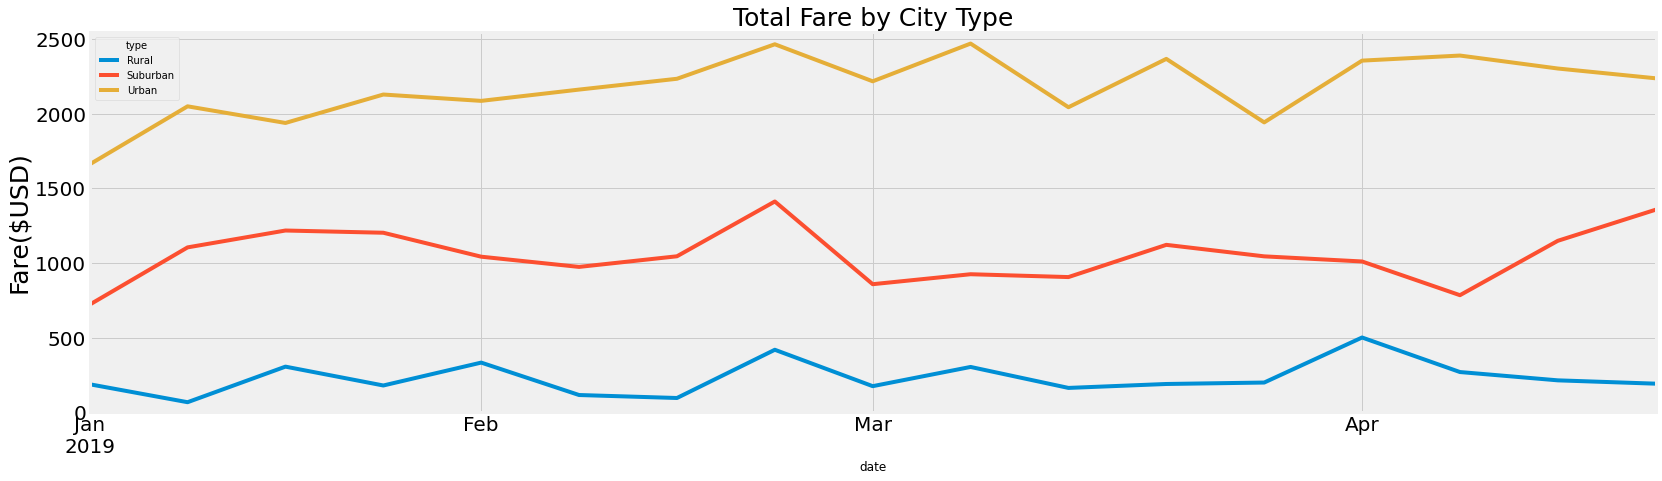

In [98]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

filtered_dates_weeks.plot(figsize=(25 ,7), kind='line')
plt.ylabel('Fare($USD)', fontsize='25')
plt.ylim(0, 2550)
plt.yticks(fontsize='20')
plt.xticks(fontsize='20')
plt.title('Total Fare by City Type', fontsize='25')
        


# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')


plt.savefig("Fig8.png")